<h2 style="color:darkblue;">Initial Conditions in the Heat Equation</h2>

<p>The <strong>heat equation</strong> in one dimension is:</p>
<p style="text-align: center;">
  <code>∂u(x,t)/∂t = α ∂²u(x,t)/∂x²</code>
</p>
<p>where:</p>
<ul>
  <li><code>u(x, t)</code> is the temperature at position <code>x</code> and time <code>t</code>.</li>
  <li><code>α</code> is the thermal diffusivity (a constant).</li>
</ul>

<h3 style="color:darkgreen;">Initial Conditions</h3>
<p>To solve this equation, we need to define the temperature distribution at the initial time <code>t = 0</code>. This is called the <em>initial condition</em>:</p>
<p style="text-align: center;">
  <code>u(x, 0) = f(x)</code>
</p>
<p>where <code>f(x)</code> is a function that specifies the initial temperature along the rod.</p>

<h3 style="color:darkgreen;">Why Sine Functions Are Common in Fourier Series Solutions</h3>
<p>The solution to the heat equation often uses a <strong>Fourier series</strong> expansion:</p>
<p style="text-align: center;">
  <code>u(x, t) = Σ<sub>n=1</sub>∞ b<sub>n</sub> sin(nπx/L) exp(-n²π²αt/L²)</code>
</p>

<p>Here:</p>
<ul>
  <li><code>b<sub>n</sub></code> are the Fourier coefficients determined from the initial condition <code>f(x)</code>.</li>
  <li><code>sin(nπx/L)</code> naturally satisfies the boundary conditions <code>u(0, t) = u(L, t) = 0</code> (Dirichlet conditions).</li>
</ul>

<p>The coefficients <code>a<sub>n</sub></code> are zero because sine functions are <strong>odd</strong>, and their integral over a symmetric interval cancels out.</p>


<h3 style="color:darkgreen;">Generalizing the Initial Condition</h3>
<p>Although a sine function is commonly used for <code>f(x)</code>, the method is general and works for any valid <code>f(x)</code>. The Fourier coefficients <code>b<sub>n</sub></code> are computed using:</p>
<p style="text-align: center;">
  <code>b<sub>n</sub> = (2/L) ∫<sub>0</sub><sup>L</sup> f(x) sin(nπx/L) dx</code>
</p>
<p>This allows for initial conditions like:</p>
<ul>
  <li><code>f(x) = sin(πx)</code>: A sine wave initial temperature.</li>
  <li><code>f(x) = x(1 - x)</code>: A parabolic initial temperature.</li>
  <li><code>f(x) = 1</code>: A uniform temperature along the rod.</li>
</ul>

<h3 style="color:darkgreen;">Interactive Demonstration in Python</h3>
<p>Below is a Python implementation in Colab that demonstrates the solution for different initial conditions.</p>

<pre style="background-color:#f4f4f4;padding:10px;border-left:4px solid #ccc;">
# Example implementation of the heat equation
heat_equation_solution(lambda x: np.sin(np.pi * x), L=1.0, alpha=0.01, N=50, x_points=100, t_points=100, T=1.0)


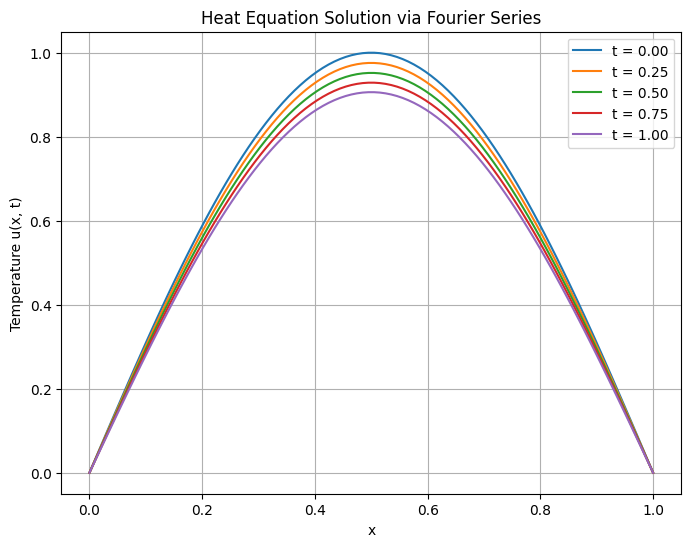

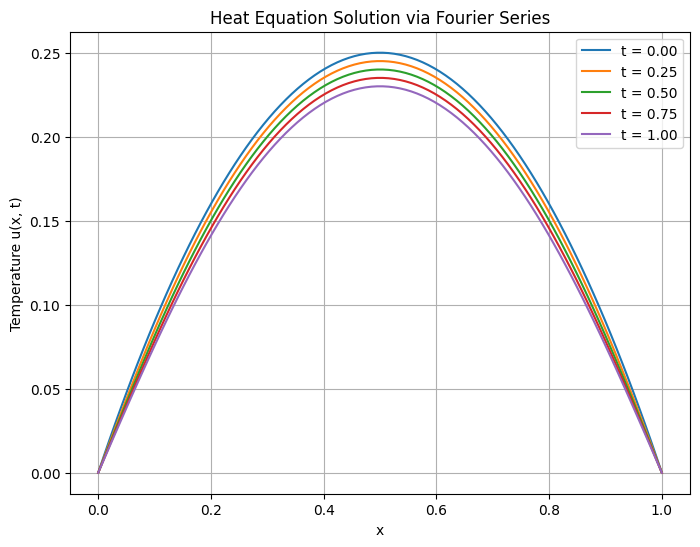

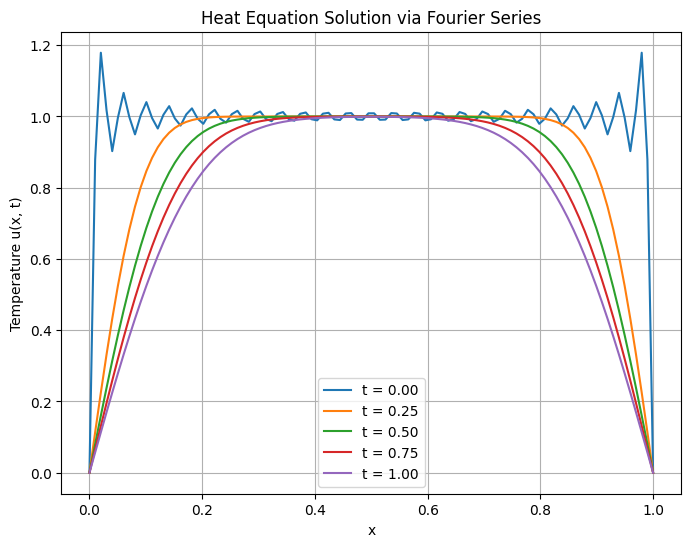

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def heat_equation_solution(f, L=1.0, alpha=0.01, N=50, x_points=100, t_points=100, T=1.0):
    """
    Solve the 1D heat equation using Fourier series with a user-defined initial condition.

    Parameters:
        f (function): Initial condition function f(x) defined on [0, L].
        L (float): Length of the rod.
        alpha (float): Thermal diffusivity.
        N (int): Number of terms in the Fourier series.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        T (float): Total time.
    """
    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)

    # Compute Fourier coefficients b_n
    def compute_bn(n):
        # Integral of f(x) * sin(n*pi*x/L) over [0, L]
        integrand = lambda x: f(x) * np.sin(n * np.pi * x / L)
        bn, error_estimate = quad(integrand, 0, L)  # Integrate using scipy's quad
        return (2 / L) * bn

    b = [compute_bn(n) for n in range(1, N + 1)]

    # Compute the solution u(x, t)
    def u_xt(x, t):
        solution = np.zeros_like(x)
        for n in range(1, N + 1):
            term = b[n - 1] * np.sin(n * np.pi * x / L) * np.exp(-alpha * (n * np.pi / L)**2 * t)
            solution += term
        return solution

    plt.figure(figsize=(8, 6))
    for time in np.linspace(0, T, 5):  # Plot for 5 time steps
        u = u_xt(x, time)
        plt.plot(x, u, label=f"t = {time:.2f}")

    plt.title("Heat Equation Solution via Fourier Series")
    plt.xlabel("x")
    plt.ylabel("Temperature u(x, t)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Examples with different initial conditions

# Example 1: Initial condition f(x) = sin(pi * x)
heat_equation_solution(lambda x: np.sin(np.pi * x), L=1.0, alpha=0.01, N=50, x_points=100, t_points=100, T=1.0)

# Example 2: Initial condition f(x) = x * (1 - x)
heat_equation_solution(lambda x: x * (1 - x), L=1.0, alpha=0.01, N=50, x_points=100, t_points=100, T=1.0)

# Example 3: Initial condition f(x) = 1
heat_equation_solution(lambda x: 1, L=1.0, alpha=0.01, N=50, x_points=100, t_points=100, T=1.0)


<h2 style="color:darkblue;">Green's Function Approach for the Heat Equation</h2>

<p>The Green's function method provides a powerful way to solve the 1D heat equation:</p>

<pre>
∂u(x, t)/∂t = α ∂²u(x, t)/∂x²,
</pre>

<p>with arbitrary initial conditions and Dirichlet boundary conditions.</p>

<h3>Key Ideas:</h3>
<ul>
  <li>
    <strong>Green's Function Definition:</strong>
    The Green's function <code>G(x, ξ, t)</code> represents the temperature at position <code>x</code>
    and time <code>t</code>, due to an initial impulse at position <code>ξ</code>.
  </li>
  <li>
    <strong>Heat Equation Green's Function:</strong>
    For an infinite domain, the Green's function is given by:
    <pre>
    G(x, ξ, t) = (1 / √(4π α t)) * exp(-(x - ξ)² / (4 α t)).
    </pre>
  </li>
  <li>
    <strong>Solution:</strong>
    The temperature <code>u(x, t)</code> is found by integrating the initial condition <code>f(ξ)</code>
    weighted by the Green's function:
    <pre>
    u(x, t) = ∫₀ᴸ f(ξ) G(x, ξ, t) dξ,
    </pre>
    where <code>L</code> is the domain length.
  </li>
</ul>

<h3>Why Use Green's Functions?</h3>
<ul>
  <li>
    Allows solving the heat equation for <strong>arbitrary initial conditions</strong>.
  </li>
  <li>
    Handles time evolution naturally by weighting contributions from the initial temperature distribution.
  </li>
  <li>
    Provides insight into the diffusion process via the exponential decay in the Green's function.
  </li>
</ul>

<h3>Steps to Solve Using Green's Functions:</h3>
<ol>
  <li>Define the Green's function <code>G(x, ξ, t)</code> for the problem.</li>
  <li>Express the solution as <code>u(x, t) = ∫ f(ξ) G(x, ξ, t) dξ</code>.</li>
  <li>Compute the integral for all points <code>x</code> and times <code>t</code>.</li>
</ol>

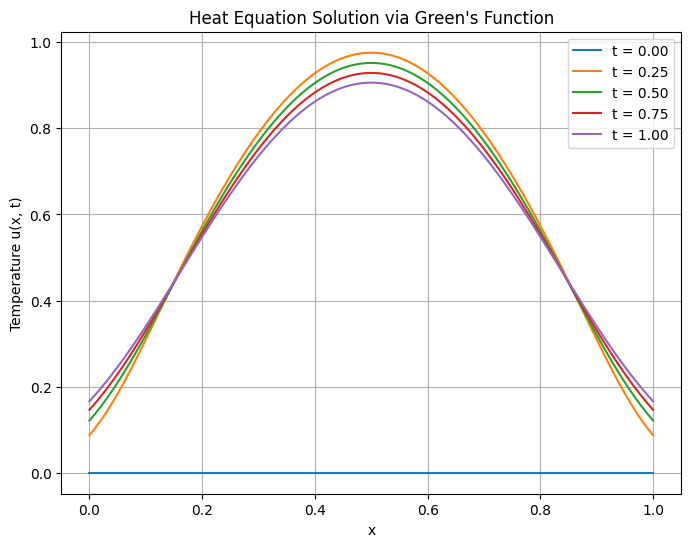

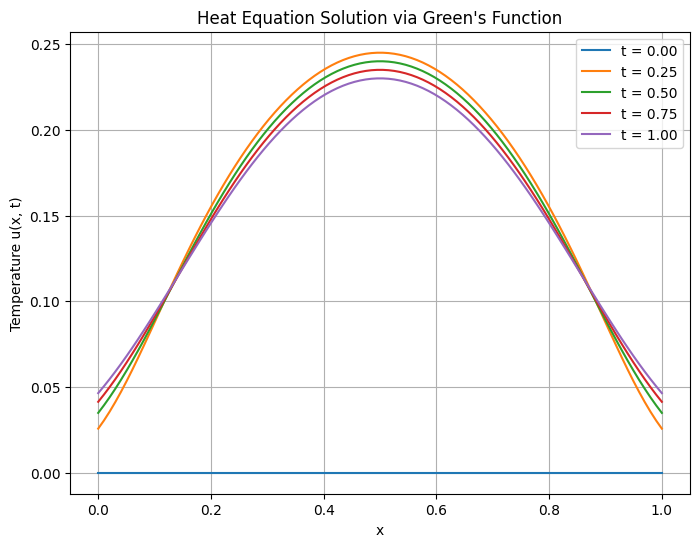

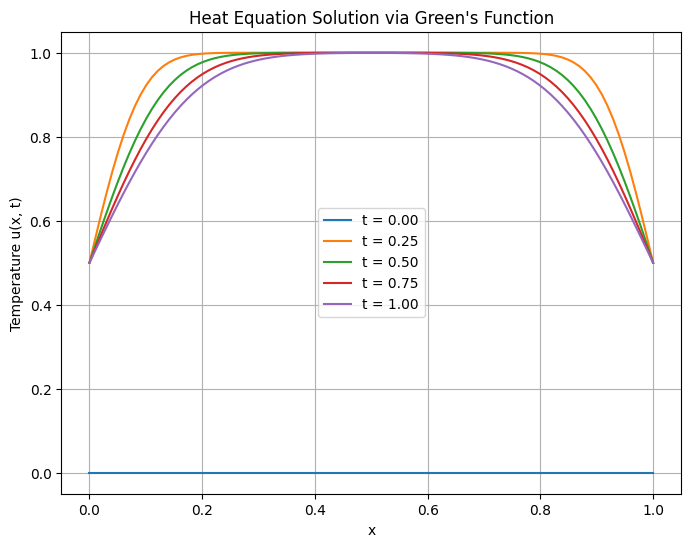

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def heat_equation_green(f, L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)->None:
    """
    Solve the 1D heat equation using the Green's function method with a user-defined initial condition.

    Parameters:
        f (function): Initial condition function f(x) defined on [0, L].
        L (float): Length of the rod.
        alpha (float): Thermal diffusivity.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        T (float): Total time.
    """
    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)

    # Green's function for the heat equation in 1D
    def G(x, xi, t):
        if t <= 0:
            return 0
        return np.sqrt(1 / (4 * np.pi * alpha * t)) * np.exp(-((x - xi)**2) / (4 * alpha * t))

    # Compute the solution u(x, t) using Green's function
    def u_xt(x, t):
        solution = np.zeros_like(x)
        for i, xi in enumerate(x):  # Evaluate integral for each point in x
            integrand = lambda x_prime: f(x_prime) * G(xi, x_prime, t)
            integral, _ = quad(integrand, 0, L)  # Integrate over the domain [0, L]
            solution[i] = integral
        return solution

    plt.figure(figsize=(8, 6))
    for time in np.linspace(0, T, 5):
        u = u_xt(x, time)
        plt.plot(x, u, label=f"t = {time:.2f}")

    plt.title("Heat Equation Solution via Green's Function")
    plt.xlabel("x")
    plt.ylabel("Temperature u(x, t)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Examples with different initial conditions

# Example 1: Initial condition f(x) = sin(pi * x)
heat_equation_green(lambda x: np.sin(np.pi * x), L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)

# Example 2: Initial condition f(x) = x * (1 - x)
heat_equation_green(lambda x: x * (1 - x), L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)

# Example 3: Initial condition f(x) = 1
heat_equation_green(lambda x: 1, L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)


<html lang="en">
  <body>
    <h2>What is a Laplace Transform?</h2>
    <p> The Laplace transform is a mathematical tool that converts a function
      <code>u(x, t)</code>in time<code>t</code>into a function in terms of a
      new variable<code>s</code>.This simplifies solving differential
      equations by turning time-dependent problems into algebraic ones.</p>
    <p>The Laplace transform of <code>u(x, t)</code> is defined as:</p>
    <div class="equation">
      <p>U(x, s) = ∫<sub>0</sub><sup>∞</sup> u(x, t) e<sup>-st</sup> dt
      </p>
    </div>
    <h2>The Heat Equation</h2>
    <p>The one-dimensional heat equation is given by:</p>
    <div class="equation">
      <p>
        ∂u(x, t)/∂t = α ∂<sup>2</sup>u(x, t)/∂x<sup>2</sup>
      </p>
    </div>
    <p>with initial condition:</p>
    <div class="equation">
      <p>u(x, 0) = f(x)</p>
    </div>
    <h2>Applying the Laplace Transform</h2>
    <p>
      Taking the Laplace transform of both sides of the heat equation with
      respect to <code>t</code>, we get:
    </p>
    <div class="equation">
      <p>
        sU(x, s) - f(x) = α ∂<sup>2</sup>U(x, s)/∂x<sup>2</sup>
      </p>
    </div>
    <p>Rearranging gives a second-order ordinary differential equation in <code>x</code>:</p>
    <div class="equation">
      <p>
        ∂<sup>2</sup>U(x, s)/∂x<sup>2</sup> - (s/α) U(x, s) = -f(x)/α
      </p>
    </div>
    <h2>Solving the Transformed Equation</h2>
    <p>
      The general solution of this ODE depends on the boundary conditions.
      Once the solution <code>U(x, s)</code> is obtained, the inverse Laplace
      transform is applied to recover <code>u(x, t)</code> in the time domain.
    </p>
  </body>
</html>



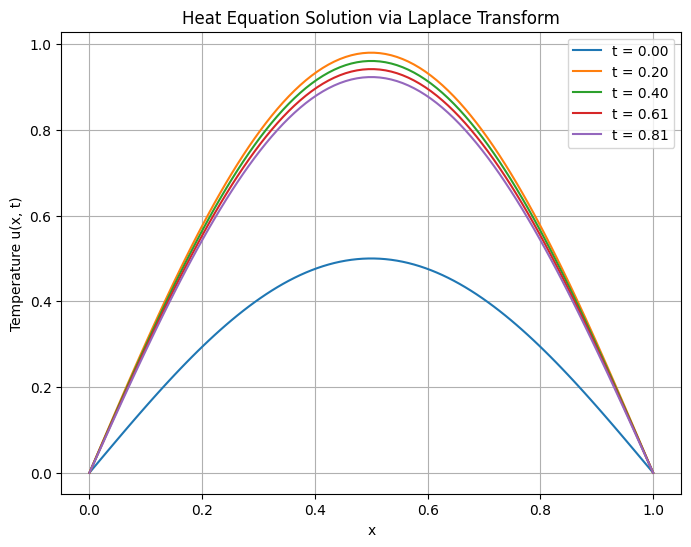

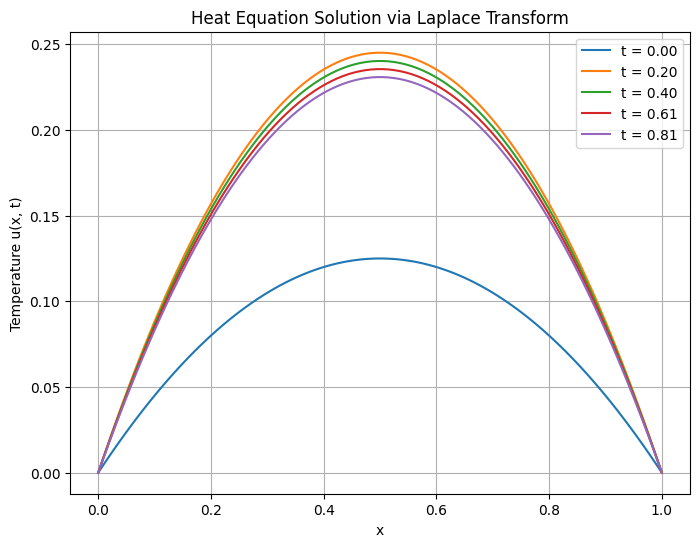

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, laplace_transform, inverse_laplace_transform, sin, pi, exp, Function

def solve_heat_equation_laplace(f, L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0):
    """
    Solve the 1D heat equation using Laplace transform and separation of variables.

    Parameters:
        f (function): Initial condition function f(x) defined on [0, L].
        L (float): Length of the rod.
        alpha (float): Thermal diffusivity.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        T (float): Total time.
    """
    x, t, s = symbols('x t s')
    U = Function('U')(x, s)

    u_init = f(x)

    # Laplace-transformed equation: sU(x, s) - f(x) = alpha * d^2U(x, s)/dx^2
    U_general = u_init / (s + (pi ** 2 * alpha))  # Derived analytical solution for U(x, s)

    # Perform the inverse Laplace transform to get u(x, t)
    u_solution = inverse_laplace_transform(U_general, s, t)

    x_vals = np.linspace(0, L, x_points)
    t_vals = np.linspace(0, T, t_points)

    u_numeric = np.zeros((t_points, x_points))
    for i, t_val in enumerate(t_vals):
        for j, x_val in enumerate(x_vals):
            u_numeric[i, j] = u_solution.subs({x: x_val, t: t_val}).evalf()

    plt.figure(figsize=(8, 6))
    for i in range(0, t_points, max(1, t_points // 5)):
        plt.plot(x_vals, u_numeric[i, :], label=f"t = {t_vals[i]:.2f}")

    plt.title("Heat Equation Solution via Laplace Transform")
    plt.xlabel("x")
    plt.ylabel("Temperature u(x, t)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example 1: Initial condition f(x) = sin(pi * x)
solve_heat_equation_laplace(lambda x: sin(pi * x), L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)

# Example 2: Initial condition f(x) = x * (1 - x)
solve_heat_equation_laplace(lambda x: x * (1 - x), L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0)
